TASK 3

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
import os

root_path = "/content/gdrive/My Drive/Skyhacks/"

In [0]:
df_labels = pd.read_csv(os.path.join(root_path, "data/labels/labels.csv"))
df_labels

,filename,standard,task2_class,tech_cond,Bathroom,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,Bed sheet,Bedroom,Cabinetry,Ceiling,Chair,Chandelier,Chest of drawers,Coffee table,Couch,Countertop,Cupboard,Curtain,Dining room,Door,Drawer,Facade,Fireplace,Floor,Furniture,Grass,Hardwood,House,Kitchen,Kitchen & dining room table,Kitchen stove,Living room,Mattress,Nightstand,Plumbing fixture,Property,Real estate,Refrigerator,Roof,Room,Rural area,Shower,Sink,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
0,A457DA6E80FFBD81B32136F30E3A90E76374F8E6.jpg,3,validation,3,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,68CAF64A6D3FE5E4F5190753C9C2D0EA95DC4ECC.jpg,3,validation,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,507C177B2C5233467A61AE295E4F53509ECB1BB5.jpg,3,validation,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
3,17939237F9737823A12906F6F0D774377F363852.jpg,3,validation,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,444D402F65800CF1A7042F1CDF5D581F5804DDDA.jpg,3,validation,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,7D382DECB186005A5979F2EC313C4CFD57B5655B.jpg,4,bedroom,4,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2737,481D2B80F25E59A945F0507BDDDEFBE1F9E592BF.jpg,4,bedroom,4,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2738,CAB0C1DB0A403F581798A66CC40FADB1A6057899.jpg,4,bedroom,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2739,703DE7EEB4928C0854062C53A7AAAB22DB044A0C.jpg,3,bedroom,4,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df_labels = df_labels.loc[:,["filename", "standard"]]
df_labels = df_labels.set_index(keys='filename', drop=True)
dict_labels = df_labels.to_dict(orient='dict')

dict_labels = dict_labels['standard']

In [0]:
import os, glob, shutil
#get all images from folder
path = os.path.join(root_path, 'data', 'raw_data',"*",'*.jpg')
print(path)
src_files = glob.glob(path)
#create dictionary for lookup values from DataFrame
lookup = {x.split('/')[-1]:x for x in src_files}
print (lookup)

/content/gdrive/My Drive/Skyhacks/data/raw_data/*/*.jpg
{'86CCE754609C9F35EE11701B44742010B88D09FA.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/86CCE754609C9F35EE11701B44742010B88D09FA.jpg', '3BE247538638FB9F30DB75B3AD1D0BF30B0BC4DB.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/3BE247538638FB9F30DB75B3AD1D0BF30B0BC4DB.jpg', 'BE145DE2D21605E7FF1EA958C5E2EC214CFF75FE.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/BE145DE2D21605E7FF1EA958C5E2EC214CFF75FE.jpg', '0AAD7B18662C0CC8EEB62CFF988C38B9B208971D.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/0AAD7B18662C0CC8EEB62CFF988C38B9B208971D.jpg', 'E784CA46FADA58E6B57584B905168C6B652C7905.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/E784CA46FADA58E6B57584B905168C6B652C7905.jpg', 'E289165655954D1CFB53BDE0791670B901E33843.jpg': '/content/gdrive/My Drive/Skyhacks/data/raw_data/living_room/E289165655954D1CFB53BDE0791670B901E33843.jpg', '2F51B9

In [0]:
output_path = os.path.join(root_path, 'transformed_data')
for fullpath, files in lookup.iterate():
  print(fullpatch, file)
  
  
  
#first create folders
path = os.path.join('/content/gdrive/My Drive/Skyhacks/my_model_data/train2/', directory)
if not os.path.exists(path):
    os.makedirs(path)

for file in files:
    #get path of each image, if not exist return None
    orig = lookup.get(file, None)
    #copy files from DataFrame
    if orig is not None:
        dest = os.path.join(path, file)
        shutil.copy(orig, dest)

In [0]:
output_path = os.path.join(root_path, 'transformed_data')

if not os.path.exists(output_path):
    os.makedirs(output_path)
    

for file, fullpath in lookup.items():
  try:
    dest_path = os.path.join(output_path, str(dict_labels[file]))
  except:
    pass
  
  if not os.path.exists(dest_path):
    os.makedirs(dest_path)
    
  shutil.copy(fullpath, os.path.join(dest_path, file))
  #print("Org:{},    Dest: {}".format(fullpath,dest_path))

# Modeling

In [0]:
def save_data(data, path, name):
  with open(os.path.join(path, name+".pickle"), 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
  
def read_data(path, name):
  with open(os.path.join(path, name), 'rb') as handle:
    data = pickle.load(handle)
  return data

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.vision.transform import *
from fastai.metrics import error_rate, accuracy

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

bs = 64
np.random.seed(5432)

In [0]:
#Paths
img_path = "/content/gdrive/My Drive/SkyHack 2019 - Team/data_task_3"


**Model 1**

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(img_path, train='data_task_3_standard', valid_pct=0.2, size=224, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


1784
445


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_model-1')
save_data(data, os.path.join(img_path, "models"), "task_3_a_1")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 57.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.267626,1.532551,0.442697,09:58
1,1.978175,1.256390,0.577528,03:39
2,1.454321,0.658116,0.782022,03:32
3,1.027943,0.493318,0.851685,03:32
4,0.750303,0.504422,0.851685,03:28
5,0.559910,0.452500,0.856180,03:24
6,0.433000,0.474035,0.862921,03:18
7,0.351861,0.487643,0.856180,03:24
8,0.294726,0.473582,0.862921,03:28
9,0.248772,0.479851,0.865169,03:21


In [0]:
torch.cuda.empty_cache()


Total size: 0


/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:101: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


**Model 2**

In [0]:
tfms = get_transforms(xtra_tfms=[brightness(change=0.7)])
data = ImageDataBunch.from_folder(img_path, train='data_task_3_standard', valid_pct=0.2, size=288, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


1784
445


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_model_a_2')
save_data(data, os.path.join(img_path, "models"), "task_3_a_2")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 55.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.230272,1.834800,0.375281,09:47


KeyboardInterrupt: ignored

In [0]:
torch.cuda.empty_cache()

Total size: 0


/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:101: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


# Task 3 part b

### Transforming data

In [0]:
import pandas as pd
import os

root_path = "/content/gdrive/My Drive/SkyHack 2019 - Team/"

In [0]:
df_labels = pd.read_csv(os.path.join(root_path, "data/labels/labels.csv"))
df_labels

,filename,standard,task2_class,tech_cond,Bathroom,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,Bed sheet,Bedroom,Cabinetry,Ceiling,Chair,Chandelier,Chest of drawers,Coffee table,Couch,Countertop,Cupboard,Curtain,Dining room,Door,Drawer,Facade,Fireplace,Floor,Furniture,Grass,Hardwood,House,Kitchen,Kitchen & dining room table,Kitchen stove,Living room,Mattress,Nightstand,Plumbing fixture,Property,Real estate,Refrigerator,Roof,Room,Rural area,Shower,Sink,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
0,A457DA6E80FFBD81B32136F30E3A90E76374F8E6.jpg,3,validation,3,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,68CAF64A6D3FE5E4F5190753C9C2D0EA95DC4ECC.jpg,3,validation,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,507C177B2C5233467A61AE295E4F53509ECB1BB5.jpg,3,validation,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
3,17939237F9737823A12906F6F0D774377F363852.jpg,3,validation,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,444D402F65800CF1A7042F1CDF5D581F5804DDDA.jpg,3,validation,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,7D382DECB186005A5979F2EC313C4CFD57B5655B.jpg,4,bedroom,4,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2737,481D2B80F25E59A945F0507BDDDEFBE1F9E592BF.jpg,4,bedroom,4,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2738,CAB0C1DB0A403F581798A66CC40FADB1A6057899.jpg,4,bedroom,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2739,703DE7EEB4928C0854062C53A7AAAB22DB044A0C.jpg,3,bedroom,4,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df_labels = df_labels.loc[:,["filename", "tech_cond"]]
df_labels = df_labels.set_index(keys='filename', drop=True)
dict_labels = df_labels.to_dict(orient='dict')

dict_labels = dict_labels['tech_cond']

In [0]:
import os, glob, shutil
#get all images from folder
path = os.path.join(root_path, 'data', 'raw_data',"*",'*.jpg')
print(path)
src_files = glob.glob(path)
#create dictionary for lookup values from DataFrame
lookup = {x.split('/')[-1]:x for x in src_files}
print (lookup)

/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/*/*.jpg
{'8AAF9BC3451B7F41004531C7F4157B98DA401E1F.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/8AAF9BC3451B7F41004531C7F4157B98DA401E1F.jpg', '7293D4E4D2C4EDA408ADC0F875091D9AB9FB2A94.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/7293D4E4D2C4EDA408ADC0F875091D9AB9FB2A94.jpg', '55FEB24D0B330174369C80527C47396A6B27A822.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/55FEB24D0B330174369C80527C47396A6B27A822.jpg', '303D683AA690FF2858E9A63B594F9E6EFDAA621F.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/303D683AA690FF2858E9A63B594F9E6EFDAA621F.jpg', '6D451FD900D4DFD47D03054BAD6BB291AFE6474D.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/6D451FD900D4DFD47D03054BAD6BB291AFE6474D.jpg', '243D3EE84F5FE48C1F0468F20FC7FD571241CC35.jpg': '/content/gdrive/My Drive/SkyHack 2019 - Team/data/raw_data/bedroom/2

In [0]:
output_path = os.path.join(root_path, 'data_task_3', 'data_task_3_techn_cond')

if not os.path.exists(output_path):
    os.makedirs(output_path)
    

for file, fullpath in lookup.items():
  try:
    dest_path = os.path.join(output_path, str(dict_labels[file]))
  except:
    pass
  
  if not os.path.exists(dest_path):
    os.makedirs(dest_path)
    
  shutil.copy(fullpath, os.path.join(dest_path, file))
  #print("Org:{},    Dest: {}".format(fullpath,dest_path))

### Model 1


In [0]:
def save_data(data, path, name):
  with open(os.path.join(path, name+".pickle"), 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
  
def read_data(path, name):
  with open(os.path.join(path, name), 'rb') as handle:
    data = pickle.load(handle)
  return data

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.vision.transform import *
from fastai.metrics import error_rate, accuracy

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

bs = 64
np.random.seed(5432)

In [0]:
#Paths
img_path = "/content/gdrive/My Drive/SkyHack 2019 - Team/data_task_3"


**Model 1**

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(img_path, train='data_task_3_techn_cond', valid_pct=0.2, size=288, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


3567
891


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_b_1')
save_data(data, os.path.join(img_path, "models"), "task_3_b_1")

epoch,train_loss,valid_loss,accuracy,time
0,2.203691,1.725110,0.466891,08:58
1,1.656257,1.165463,0.576880,08:55
2,1.147830,0.753585,0.667789,08:45
3,0.842047,0.751028,0.650954,08:44
4,0.735489,0.681179,0.675645,08:50
5,0.668575,0.701199,0.668911,08:34
6,0.613740,0.691255,0.675645,08:24
7,0.571969,0.673471,0.679012,08:28
8,0.537822,0.680471,0.663300,08:28
9,0.522346,0.678864,0.665544,08:45


### Model 2

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(img_path, train='data_task_3_techn_cond', valid_pct=0.2, size=244, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


3567
891


In [0]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_b_2')
save_data(data, os.path.join(img_path, "models"), "task_3_b_2")

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:03<00:00, 53.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.109380,1.558454,0.425365,08:30
1,1.646881,1.146072,0.609428,08:22
2,1.126142,0.770060,0.674523,08:20
3,0.860294,0.685485,0.701459,08:31
4,0.721076,0.742076,0.672278,08:21
5,0.647822,0.690347,0.675645,08:22
6,0.597901,0.700828,0.667789,08:26
7,0.565497,0.687257,0.683502,08:32
8,0.539634,0.691146,0.682379,08:19
9,0.529651,0.688781,0.674523,08:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


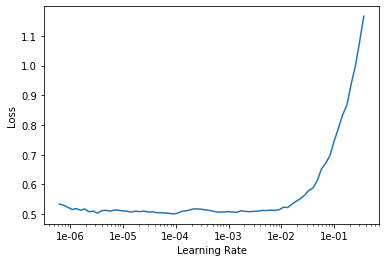

In [0]:
learn.lr_find()
learn.recorder.plot()

low_lr = 0
high_lr = 0

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.559652,0.743466,0.676768,08:27
1,0.693788,0.956875,0.649832,08:17
2,0.754310,0.769086,0.657688,08:14
3,0.705090,0.774122,0.676768,08:15
4,0.640395,0.726669,0.721661,08:14
5,0.565693,0.747836,0.656566,08:11
6,0.499728,0.839854,0.634119,08:15
7,0.440229,0.917675,0.634119,08:13
8,0.396257,1.024400,0.638608,08:19
9,0.370156,0.995352,0.638608,08:20


In [0]:
learn.save('Task_3_b_2_tuned')

### Model 3

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(img_path+"/ahh", train='data_task_3_techn_cond', valid_pct=0.2, size=244, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


1784
445


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_b_3')
save_data(data, os.path.join(img_path, "models"), "task_3_b_3")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 82.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.109163,1.633351,0.514607,07:55
1,1.828707,1.560184,0.570787,03:55
2,1.493643,1.108012,0.615730,03:50
3,1.172671,0.962469,0.671910,03:51
4,0.954949,0.858567,0.678652,03:50
5,0.783479,0.804786,0.694382,03:51
6,0.668218,0.811225,0.692135,03:53
7,0.577368,0.854555,0.678652,03:52
8,0.512573,0.820065,0.658427,03:50
9,0.472863,0.811904,0.658427,03:53


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


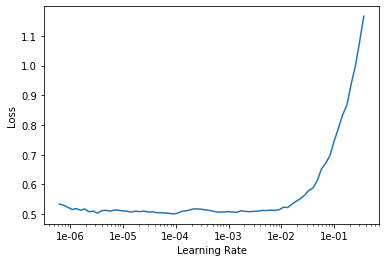

In [0]:
learn.lr_find()
learn.recorder.plot()

low_lr = 0
high_lr = 0

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.559652,0.743466,0.676768,08:27
1,0.693788,0.956875,0.649832,08:17
2,0.754310,0.769086,0.657688,08:14
3,0.705090,0.774122,0.676768,08:15
4,0.640395,0.726669,0.721661,08:14
5,0.565693,0.747836,0.656566,08:11
6,0.499728,0.839854,0.634119,08:15
7,0.440229,0.917675,0.634119,08:13
8,0.396257,1.024400,0.638608,08:19
9,0.370156,0.995352,0.638608,08:20


In [0]:
learn.save('Task_3_b_2_tuned')

### Model 4


In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(img_path+"/ahh", train='data_task_3_techn_cond', valid_pct=0.2, size=400, ds_tfms=tfms).normalize()

In [0]:
# Walidacja
print(len(data.train_ds))
print(len(data.valid_ds))
#print(len(data.test_ds))


1784
445


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(10)
learn.save('Task_3_b_4')
save_data(data, os.path.join(img_path, "models"), "task_3_b_4")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 96.2MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.131939,1.379738,0.503371,04:25
1,1.768716,1.092343,0.635955,04:20
2,1.474996,0.912600,0.658427,04:27
3,1.208869,0.801676,0.705618,04:27
4,0.999953,0.723620,0.703371,04:23
5,0.838903,0.693477,0.705618,04:24
6,0.725236,0.680791,0.705618,04:25
7,0.639435,0.672770,0.712360,04:24
8,0.591529,0.674279,0.707865,04:21
9,0.553956,0.669510,0.725843,04:23


In [0]:
learn.save('Task_3_b_4')
save_data(data, os.path.join(img_path, "models"), "task_3_b_4")